In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'x')

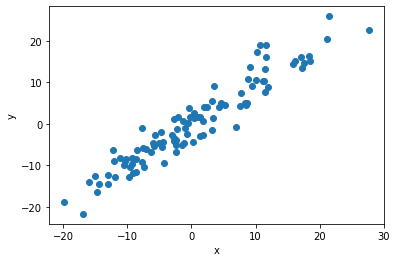

In [2]:
torch.manual_seed(2)
#generate dataset
X=torch.randn(100,1)*10
y=X+3*torch.randn(100,1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [3]:
#creating class LR which inheritate from nn.Mocule.we are making a custom class.
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        pred = self.linear(x)
        return pred
   

In [4]:

model = LR(1, 1) #one input and one output
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [6]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()

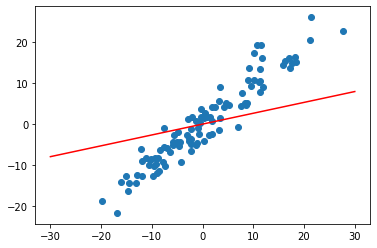

In [7]:
plot_fit('Initial Model')

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
epochs =100
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
  
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 57.68190383911133
epoch: 1 loss: 54.539527893066406
epoch: 2 loss: 51.6008186340332
epoch: 3 loss: 48.852516174316406
epoch: 4 loss: 46.282325744628906
epoch: 5 loss: 43.878692626953125
epoch: 6 loss: 41.630859375
epoch: 7 loss: 39.5286750793457
epoch: 8 loss: 37.5627326965332
epoch: 9 loss: 35.72419357299805
epoch: 10 loss: 34.004783630371094
epoch: 11 loss: 32.396820068359375
epoch: 12 loss: 30.893049240112305
epoch: 13 loss: 29.48674774169922
epoch: 14 loss: 28.171585083007812
epoch: 15 loss: 26.941633224487305
epoch: 16 loss: 25.79141616821289
epoch: 17 loss: 24.715709686279297
epoch: 18 loss: 23.709733963012695
epoch: 19 loss: 22.768949508666992
epoch: 20 loss: 21.889141082763672
epoch: 21 loss: 21.066326141357422
epoch: 22 loss: 20.29684829711914
epoch: 23 loss: 19.577247619628906
epoch: 24 loss: 18.90427017211914
epoch: 25 loss: 18.274904251098633
epoch: 26 loss: 17.686328887939453
epoch: 27 loss: 17.135892868041992
epoch: 28 loss: 16.621131896972656
epoch: 29 los

Text(0.5, 0, 'epoch')

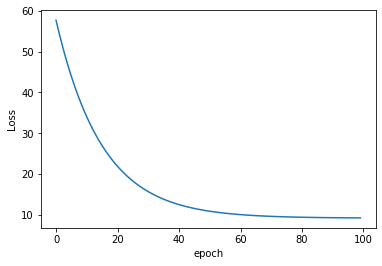

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

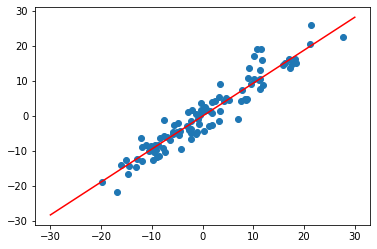

In [11]:
plot_fit("Trained Model")